Hi Everyone,

This is the notebook from the Columbia Data Science Society's Workshop on ** Applied Machine Learning**.

**Presented by:** Akhil Punia, MS Data Science ( 2019 )

# Acknowledgement
The content of this talk is motivated from the two classes, I am taking this semester at Columbia Data Science Institute.

- [COMS W4995 Applied Machine Learning ](http://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/) *taught by* Andread C. Müller, core contributer of sci-kit learn and author of the O'Reilly book "Introduction to machine learning with Python", describing a practical approach to machine learning with python and scikit-learn. 
- [COMS W4721 Machine Learning for Data Science](http://www.columbia.edu/~jwp2128/Teaching/W4721/Spring2019/W4721Spring2019.html) * taught by*
Prof. John Paisley. He also teaches a course on [**Machine Learning**](https://www.edx.org/course/machine-learning-columbiax-csmm-102x-0) through **edx**.The content of his on-campus course largely overlaps with his edx class.


# 0 Boilerplate Code

In [4]:
! wget https://www.dropbox.com/s/tyepwonaepli4ky/kaggle-house-prices.zip

--2019-02-28 22:23:47--  https://www.dropbox.com/s/tyepwonaepli4ky/kaggle-house-prices.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tyepwonaepli4ky/kaggle-house-prices.zip [following]
--2019-02-28 22:23:47--  https://www.dropbox.com/s/raw/tyepwonaepli4ky/kaggle-house-prices.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef5c40208940619580d94a50c3.dl.dropboxusercontent.com/cd/0/inline/AcNf_5uZU3GJ8fzHVXKlpTX22wXtOEpCJOJRWp8Qv18a8AnWH5hbP7qVtwMFiHSre596X3M-YtrT-wJoog6XYtnhr07zsNtHtVA4iEgoPiPR1N-nmrRj5_bgumga5e8yIDQ/file# [following]
--2019-02-28 22:23:48--  https://ucef5c40208940619580d94a50c3.dl.dropboxusercontent.com/cd/0/inline/AcNf_5uZU3GJ8fzHVXKlpTX22wXtOEpCJOJRWp8Qv18a8AnWH5hbP7qVtwMFiHSre596X3M-YtrT-wJoo

In [5]:
#! rm -rf kaggle-house-prices/
! unzip kaggle-house-prices.zip

Archive:  kaggle-house-prices.zip
   creating: kaggle-house-prices/
  inflating: kaggle-house-prices/test.csv  
   creating: __MACOSX/
   creating: __MACOSX/kaggle-house-prices/
  inflating: __MACOSX/kaggle-house-prices/._test.csv  
  inflating: kaggle-house-prices/data_description.txt  
  inflating: __MACOSX/kaggle-house-prices/._data_description.txt  
  inflating: kaggle-house-prices/train.csv  
  inflating: __MACOSX/kaggle-house-prices/._train.csv  
  inflating: kaggle-house-prices/sample_submission.csv  
  inflating: __MACOSX/kaggle-house-prices/._sample_submission.csv  
  inflating: __MACOSX/._kaggle-house-prices  


In [6]:
# Run Once at the Start. And then Restart.
#! pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 26.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
# Run Once.
! pip install scikit-optimize

    100% |████████████████████████████████| 81kB 5.1MB/s 


# 1 Data

Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.  Also, found on Kaggle as an **[Advanced Regression Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)** usually recommended for beginners.

**Dataset Desciption Link:** http://jse.amstat.org/v19n3/decock/DataDocumentation.txt


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [0]:
# loading the dataset into 'train' variable
train = pd.read_csv('kaggle-house-prices/train.csv')

In [4]:
# visualise the first 5 rows of our dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check number of ( rows x columns ) in our data
train.shape

(1460, 81)

In [6]:
# which columns have missing values
train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# quick and easy way to check the data types of differrent feature columns
train.dtypes[train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## 1.1 Exploratory Data Analysis

- How do we treat and visualise different type of features ?
- What is the best plot for a particular feature type? 
- What understanding can we gain from a particular figure ?

### 1.1.1 Categorical Variables
Usually take up discrete set of values. 

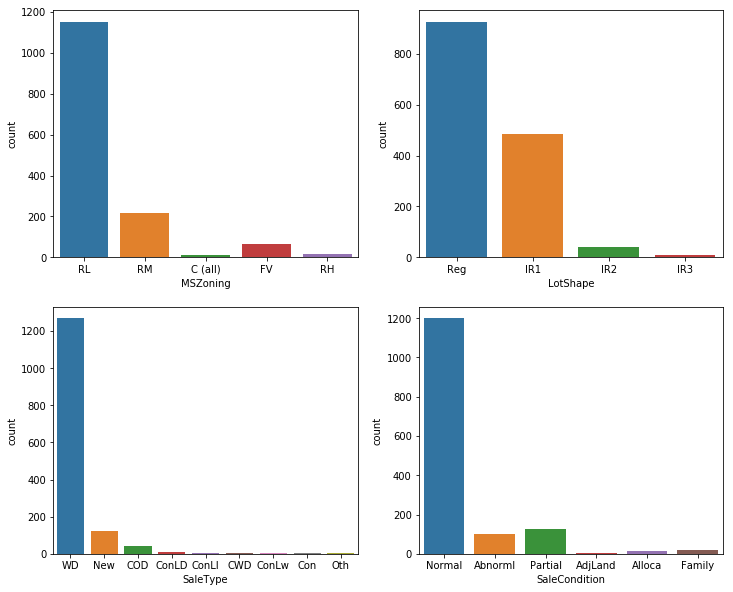

In [101]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.countplot(x="MSZoning", data=train)
plt.subplot(2, 2, 2)
sns.countplot(x="LotShape", data=train)
plt.subplot(2, 2, 3)
sns.countplot(x="SaleType", data=train)
plt.subplot(2, 2, 4)
sns.countplot(x="SaleCondition", data=train)
plt.show()

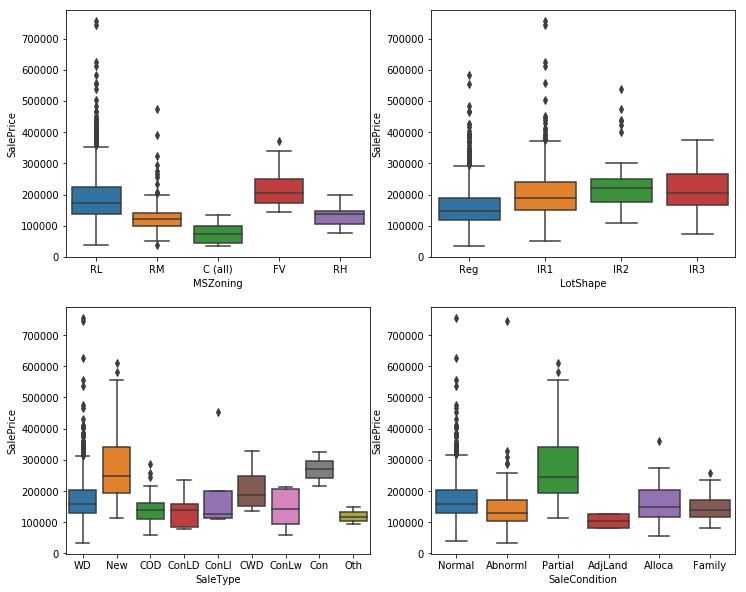

In [102]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=train)
plt.subplot(2, 2, 2)
sns.boxplot(x="LotShape", y="SalePrice", data=train)
plt.subplot(2, 2, 3)
sns.boxplot(x="SaleType", y="SalePrice", data=train)
plt.subplot(2, 2, 4)
sns.boxplot(x="SaleCondition", y="SalePrice", data=train)
plt.show()

### 1.1.2 Continous Variables
1 D Distribution of continous variable is usually expressed through histograms or density plots. It helps the skewness and modes of the distribution. 

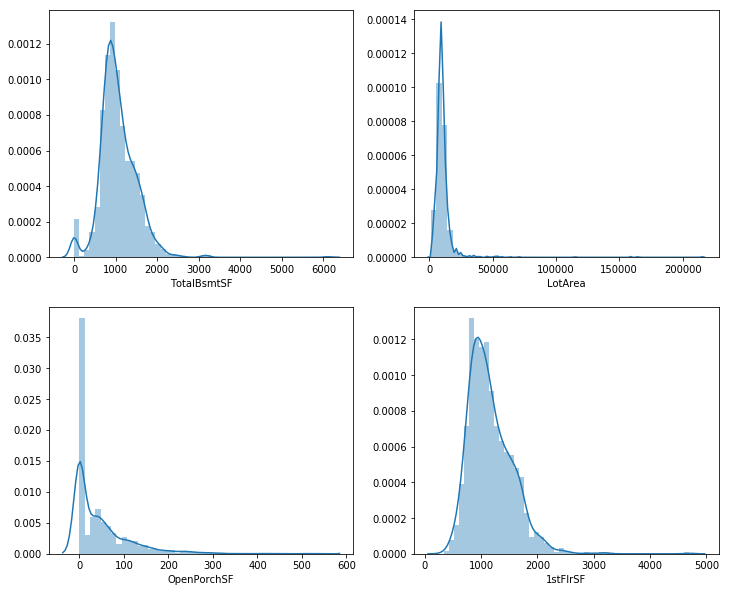

In [103]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.distplot(train.TotalBsmtSF)
plt.subplot(2, 2, 2)
sns.distplot(train.LotArea)
plt.subplot(2, 2, 3)
sns.distplot(train.OpenPorchSF)
plt.subplot(2, 2, 4)
sns.distplot(train['1stFlrSF'])
plt.show()

Influence of Continous Variable on Target Variable. Usually though a scatter plot.

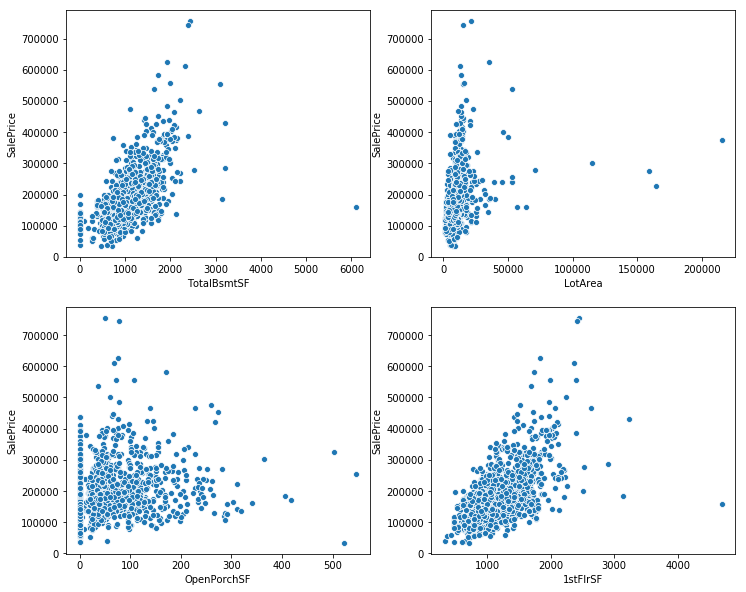

In [104]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train)
plt.subplot(2, 2, 2)
sns.scatterplot(x="LotArea", y="SalePrice", data=train)
plt.subplot(2, 2, 3)
sns.scatterplot(x="OpenPorchSF", y="SalePrice", data=train)
plt.subplot(2, 2, 4)
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=train)
plt.show()

### 1.1.3 Ordinal Variables
Seem like continous ( due to data type ), but are more like categorical with only a limited set of values. Usually follow a cerain logical order. for ex: increasing number of cars a grage can house.

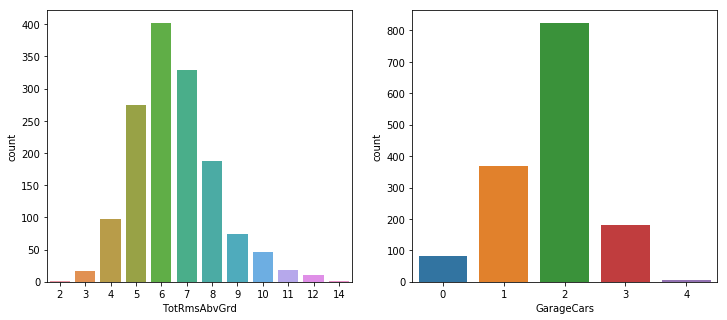

In [105]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x="TotRmsAbvGrd", data=train)
plt.subplot(1, 2, 2)
sns.countplot(x="GarageCars", data=train)
plt.show()

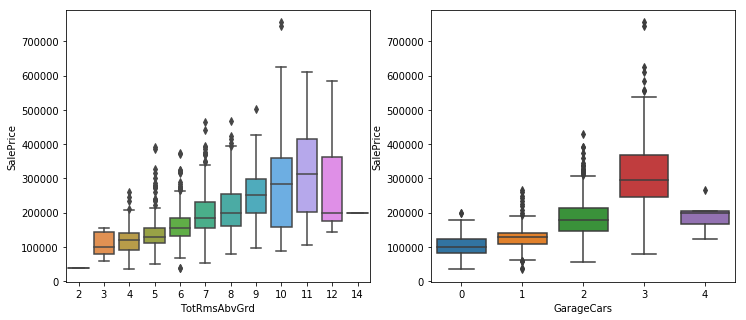

In [106]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train)
plt.subplot(1, 2, 2)
sns.boxplot(x="GarageCars", y="SalePrice", data=train)

## 1.2 Feature Engineering and Preprocessing

In [0]:
oldtrain = train.copy()

# creating the taarget variable and dropping unnecesary columns
target = train.SalePrice
train.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures 
from sklearn.impute import SimpleImputer

In [0]:
cont = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
        'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
        '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal']

cat_ord = [ i for i in train.columns if i not in cont]

### 1.2.1 Treating Missing Data, Scaling and Label Encodings ( All in One )

In [0]:
'''
# creating 'other' category for catagorical and ordinal vaiables
for col in cat_ord: 
  train[col].fillna(-1, inplace = True)
'''  
cat_cols = train.dtypes[train.dtypes=='object'].index

# creating 'other' category for catagorical vaiables
for col in cat_cols:
  train[col].fillna('other', inplace = True)

In [0]:
categorical = train.dtypes == object

In [0]:
preprocess_1 = make_column_transformer(
        (make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), 
         ~categorical),
        (OneHotEncoder(handle_unknown = 'ignore'), categorical))

In [0]:
data = preprocess.fit_transform(train)

### 1.2.3 Polynomial Features

In [0]:
preprocess_2 = make_column_transformer(
        (make_pipeline(SimpleImputer(strategy="median"), PolynomialFeatures(2), 
                       StandardScaler()), 
         ~categorical),
        (OneHotEncoder(handle_unknown = 'ignore'), categorical))

In [0]:
data2 = preprocess.fit_transform(train)

## 1.3 Outliers

One type of models are severly affected by Outliers -  The Values that lie .

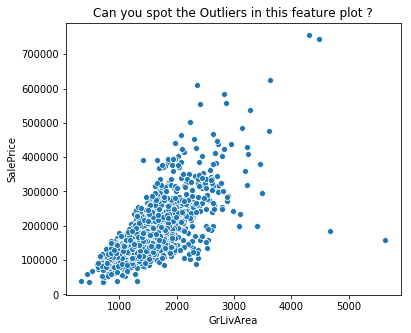

In [131]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=oldtrain)
plt.title('Can you spot the Outliers in this feature plot ?')
plt.show()

# 2 Model

In general Machine Learning problems can be classified into two different type based on the type of target variable: 
-  Classsification ( Continous )
-  Regression ( Categorical / Ordinal )

However, the methods to solve both of these problems fall under the purview of what is called **Supervised Learning**. ie. learning from exmaples.

If we think clearly, there are two main approaches to solving Supervised Learning.
1. Regression ( basically, a major portion of what statisticians talk about. )
2. Rule Based Methods. ( ex: Decision Trees )

**Resource: **
- Useful Library: [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/)

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

import xgboost

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, target, 
                                                    test_size=0.33, 
                                                    random_state=42)

## 2.1 Linear Regression

In [0]:
model_1 = make_pipeline( preprocess_1, LinearRegression()) 

In [148]:
scores = cross_val_score( model_1, X_train, y_train, scoring = 'r2', cv = 5 )
np.mean(scores)

0.6827031583861629

In [0]:
model_2 = make_pipeline( preprocess_2, LinearRegression()) 

In [150]:
scores = cross_val_score( model_2, X_train, y_train, scoring = 'r2', cv = 5 )
np.mean(scores)

-2.6070241179314088e+23

## 2.2 Logistic Regression

In [0]:
c_target = oldtrain.SaleCondition
c_train = oldtrain.drop('SaleCondition', axis = 1)

c_cat_cols = c_train.dtypes[c_train.dtypes=='object'].index

# creating 'other' category for catagorical vaiables
for col in c_cat_cols:
  c_train[col].fillna('other', inplace = True)

In [0]:
c_categorical = c_train.dtypes == object
 
preprocess = make_column_transformer(
        (make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), 
         ~c_categorical),
        (OneHotEncoder(handle_unknown = 'ignore'), c_categorical))

In [0]:
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(c_train, c_target, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = c_target)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model_3 = make_pipeline( preprocess, LogisticRegression()) 

In [206]:
scores = cross_val_score( model_3, X_ctrain, y_ctrain, cv = 5 )
np.mean(scores)

0.897880234281746

## 2.3 Tree Based Methods

### 2.3.1 Random Forest

In [0]:
model_4 = make_pipeline( preprocess_1, RandomForestRegressor()) 

In [155]:
scores = cross_val_score( model_4, X_train, y_train, scoring = 'r2', cv = 5 )
np.mean(scores)

0.8079396190881996

In [0]:
model_5 = make_pipeline( preprocess_2, RandomForestRegressor()) 

In [165]:
scores = cross_val_score( model_5, X_train, y_train, scoring = 'r2', cv = 5 )
np.mean(scores)

0.8239960667092511

### 2.3.2 Gradient Boosing : ( xgboost )

In [0]:
xgb_reg = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model_6 = make_pipeline( preprocess_1, xgb_reg )

In [321]:
# It will take a minute to run! Patience is the Key.
scores = cross_val_score( model_6, X_train, y_train, scoring = 'r2', cv = 5 )
np.mean(scores)

0.8560653784783095

# 3 Model Evaluation and Improvement ( aka Parameter Tuning ) 

## 3.1 Metrics

**Resource:**
-  Article: https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4

In [0]:
from sklearn.metrics import classification_report

In [0]:
y_cpredtr = model_3.fit(X_ctrain, y_ctrain).predict(X_ctrain)
y_cpred = model_3.fit(X_ctrain, y_ctrain).predict(X_ctest)

In [215]:
class_names = y_ctest.unique()

print(classification_report(y_ctest, y_cpred, target_names = class_names))

              precision    recall  f1-score   support

      Normal       0.21      0.09      0.13        33
     Partial       0.00      0.00      0.00         1
     Abnorml       0.00      0.00      0.00         4
     AdjLand       0.00      0.00      0.00         7
      Family       0.90      0.98      0.94       396
      Alloca       1.00      0.88      0.94        41

   micro avg       0.89      0.89      0.89       482
   macro avg       0.35      0.32      0.33       482
weighted avg       0.84      0.89      0.86       482



## 3.2 Plots

### 3.2.1 Confusion Matrix and ROC ( Classification )

In [0]:
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 32   0   0   0  36   0]
 [  0   3   0   0   0   0]
 [  0   0   7   0   1   0]
 [  0   0   0   2  11   0]
 [  4   0   0   0 798   0]
 [  0   0   0   0   0  84]]
Confusion matrix, without normalization
[[  3   0   0   0  30   0]
 [  0   0   0   0   1   0]
 [  1   0   0   0   3   0]
 [  0   0   0   0   7   0]
 [  8   0   0   0 388   0]
 [  2   0   0   0   3  36]]
Normalized confusion matrix
[[0.47 0.   0.   0.   0.53 0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.88 0.   0.12 0.  ]
 [0.   0.   0.   0.15 0.85 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]
Normalized confusion matrix
[[0.09 0.   0.   0.   0.91 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.25 0.   0.   0.   0.75 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.02 0.   0.   0.   0.98 0.  ]
 [0.05 0.   0.   0.   0.07 0.88]]


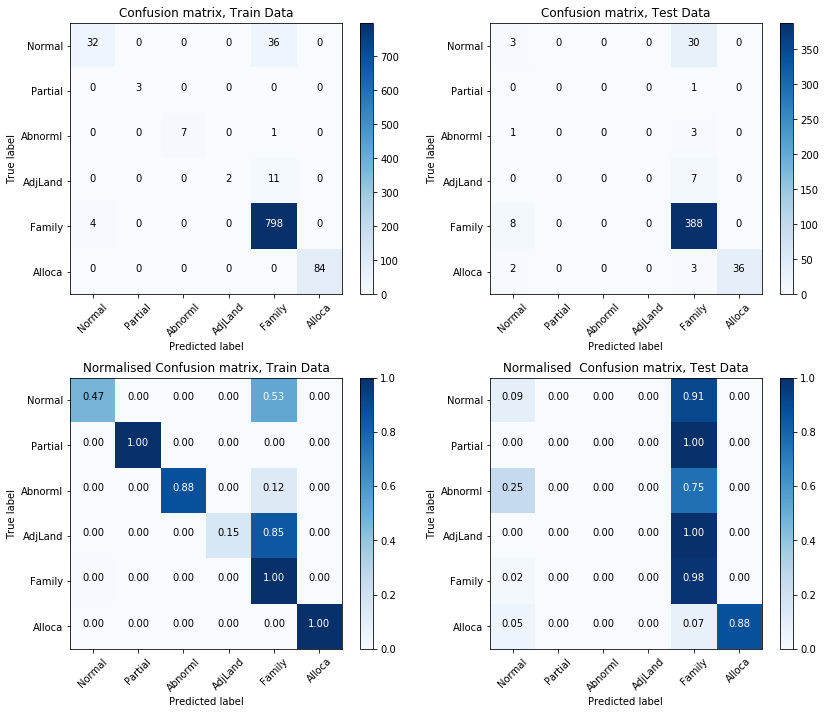

In [218]:
# Compute confusion matrix
cnf_matrix_1 = confusion_matrix(y_ctrain, y_cpredtr);
cnf_matrix_2 = confusion_matrix(y_ctest, y_cpred);
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plot_confusion_matrix(cnf_matrix_1, classes=class_names,
                      title='Confusion matrix, Train Data')
plt.subplot(2,2,2)
plot_confusion_matrix(cnf_matrix_2, classes=class_names,
                      title='Confusion matrix, Test Data')
plt.subplot(2,2,3)
plot_confusion_matrix(cnf_matrix_1, classes=class_names,normalize=True,
                      title='Normalised Confusion matrix, Train Data')
plt.subplot(2,2,4)
plot_confusion_matrix(cnf_matrix_2, classes=class_names,normalize=True,
                      title='Normalised  Confusion matrix, Test Data')

plt.show()

In [0]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle


y_tr = label_binarize(y_ctrain, classes=['Normal', 'Partial', 'Abnorml', 'AdjLand', 
                                    'Family', 'Alloca'])

y_te = label_binarize(y_ctest, classes=['Normal', 'Partial', 'Abnorml', 'AdjLand', 
                                    'Family', 'Alloca'])

y_cpred_proba = model_3.fit(X_ctrain, y_ctrain).predict_proba(X_ctest)
n_classes = 6

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_te[:, i], y_cpred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_cpred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

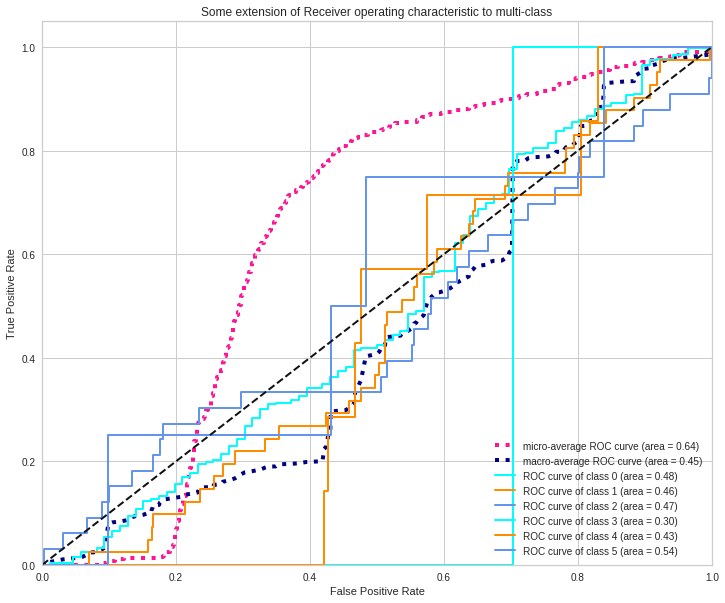

In [281]:
# Compute macro-average ROC curve and ROC area

lw =2 

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 3.2.2 Residual Plots ( Regression )

In [0]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
lr = LinearRegression()
rf = RandomForestRegressor()

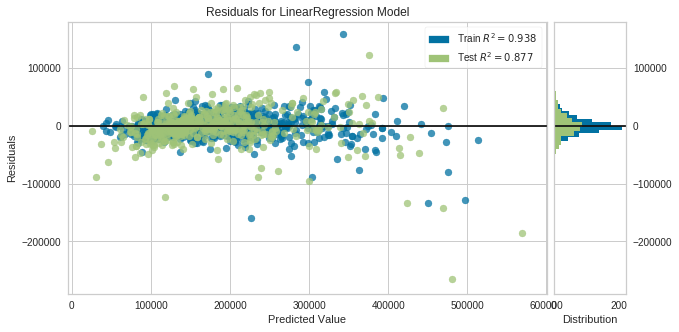

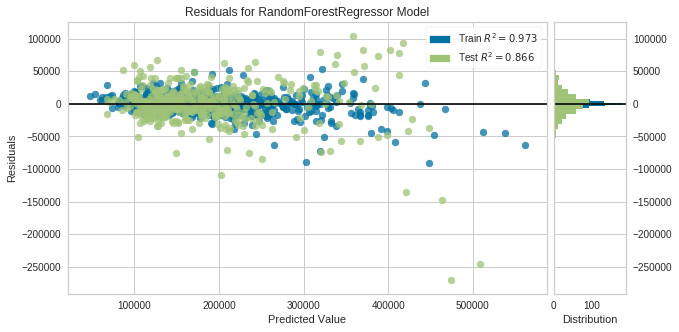

In [236]:
reg_train = preprocess_1.fit_transform(X_train)
reg_test = preprocess_1.transform(X_test)

plt.figure(figsize=(10, 5))

visualizer = ResidualsPlot(lr)
visualizer.fit(reg_train, y_train)  # Fit the training data to the model
visualizer.score(reg_test, y_test)  # Evaluate the model on the test data
visualizer.poof() # Draw/show/poof the data

plt.figure(figsize=(10, 5))

visualizer = ResidualsPlot(rf)
visualizer.fit(reg_train, y_train)  # Fit the training data to the model
visualizer.score(reg_test, y_test)  # Evaluate the model on the test data
visualizer.poof() # Draw/show/poof the data

plt.show()

## 3.3 Old Fashioned Optimization

GridSearchCV and RandomSearchCV

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [253]:
param_grid = {'alpha': np.arange(0,1,0.1)}
print(param_grid)

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}


In [254]:
# This will take a few minutes. 
grid = GridSearchCV(ElasticNet(), param_grid, cv=5)

grid.fit(preprocess_1.fit_transform(X_train), y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [255]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.5}
0.790716627389654


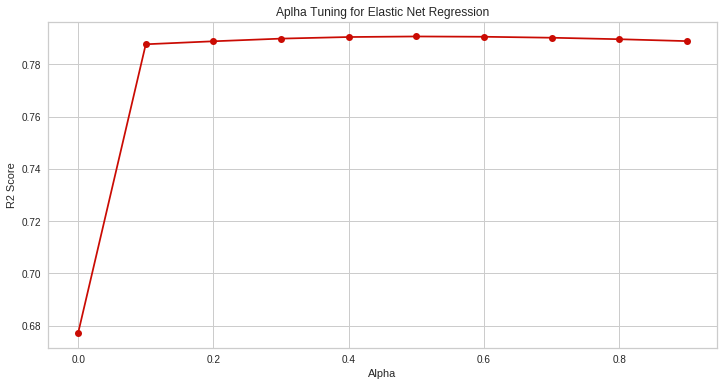

In [258]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,1,0.1), grid.cv_results_['mean_test_score'], '\
ro-')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title('Aplha Tuning for Elastic Net Regression')
plt.show()

## 3.4 New Techniques

**Resource: **
- Useful Library:
  1. [skopt](https://scikit-optimize.github.io/notebooks/hyperparameter-optimization.html)
  2. [bayesopt](https://github.com/fmfn/BayesianOptimization)
  3. [hyperopt](https://github.com/hyperopt/hyperopt)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, preprocess_1.fit_transform(X_train), 
                                    y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [316]:
# Attention: This part of the code will take about 2-3 mins to execute. 

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=18185.6640'

In [317]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=3
- learning_rate=0.209294
- max_features=47
- min_samples_split=60
- min_samples_leaf=31


# 4 Special Challenges

Often machine learning algorithms fail to generalise on real world problems. While diagnosing the problems, I have usually found two most common problems that beginners of machine learning need to pay special attention to.

## 4.1 Overfitting

If we do not regularise our model, we may fall in the trap of overfitting on our train data. How can we avoid that ? And, is there a way to know if more data will help improve model performance. 

**Resource: **
- Useful Library: [Yellowbrick: Machine Learning Visualization](https://www.scikit-yb.org/en/latest/index.html)

### 4.1.1 Learning Curve

In [0]:
from sklearn.linear_model import RidgeCV
from yellowbrick.model_selection import LearningCurve, ValidationCurve

sizes = np.linspace(0.3, 1.0, 10)

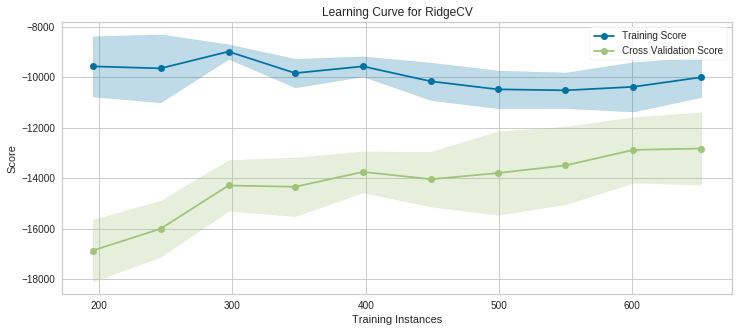

In [306]:
# Please note this cell will take few minutes to execute
# Create the learning curve visualizer, fit and poof
plt.figure(figsize=(12,5))
viz = LearningCurve(RidgeCV(), train_sizes=sizes, scoring='neg_median_absolute_error')
viz.fit(preprocess_1.fit_transform(X_train), y_train)
viz.poof()

### 4.1.2 Validation Curve

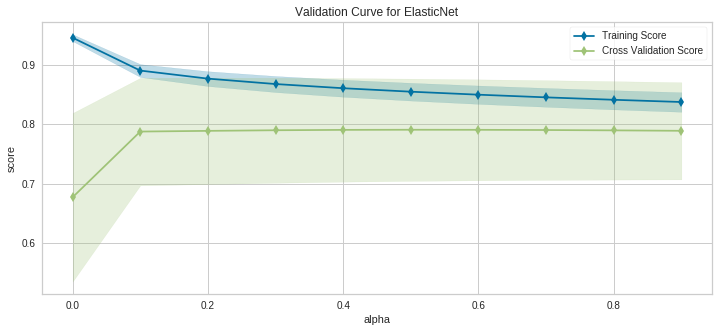

In [307]:
plt.figure(figsize=(12,5))  

viz = ValidationCurve(
    ElasticNet(), param_name="alpha",
    param_range=np.arange(0,1,0.1), cv=5, scoring="r2"
)

# Fit and poof the visualizer
viz.fit(preprocess_1.fit_transform(X_train), y_train)
viz.poof()

## 4.2 Class Imbalance

Particularly in classification problems, we find that the toughest probelms are the ones that involve heavy class imbalance. In such cases, numerous methods have been suggested in the literature to either undersample the majority class or oversample the minority class.

**Resource: **
- Useful Library: [imblearn: imbalnced learn](https://imbalanced-learn.readthedocs.io/en/stable/index.html)
- [PyData Talk : Resmapling techniques to tackle class imbalance problems](https://www.youtube.com/watch?v=-Z1PaqYKC1w)

# 5. Model Explainability

When all is set and done and the metrics are in the right neighborhood.  We would like to know what our model has actually learnt and how can we use that to guide our decisions and explain it to key stakeholders.  

## 5.1 Feature Importance

### 5.1.1 Xgboost Feature Importance

In [0]:
from xgboost import plot_importance

In [336]:
# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
xgb_reg.fit(preprocess_1.fit_transform(X_train), y_train)
#xgb_reg.get_booster().get_score(importance_type='weight')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

<Figure size 1080x1080 with 0 Axes>

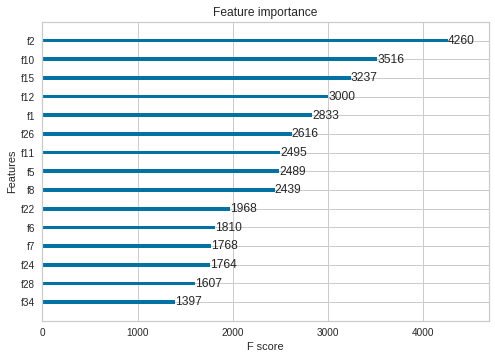

In [337]:
# Visualising Importantn Features
plt.figure(figsize=(15,15))
plot_importance(xgb_reg, max_num_features = 15)
plt.show()

### 5.1.2 Importance of Individual Predictions ( Understanding SHAP Values)

In [1]:
! pip install shap

    100% |████████████████████████████████| 225kB 9.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap


In [0]:
import shap

In [3]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgb_reg)
X = preprocess_1.fit_transform(X_train)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

NameError: ignored